**Run the following two cells before you begin.**

In [3]:
%autosave 10

Autosaving every 10 seconds


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [105]:
# Import data set
data=pd.read_csv('cleaned_data.csv')

In [106]:
# Create features list
feature_list=['LIMIT_BAL','EDUCATION','MARRIAGE','AGE','PAY_1','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [107]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [108]:
from sklearn.model_selection import train_test_split
X,x_test,Y,y_test=train_test_split(data[feature_list].values,data['default payment next month'].values
                                   ,test_size=0.2,random_state=42)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(data[feature_list]))

MinMaxScaler(copy=True, feature_range=(0, 1))


_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [110]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [111]:
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', scaler), ('model', lr)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [112]:
# Use `get_params`
from sklearn.base import BaseEstimator
def get_params(self, deep=False):
        return {
            'verbose': self.verbose,
        }
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=1000,
                      multi_class='warn', n_jobs=None, penalty='l2',
                      random_state=None, solver='saga', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fi

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [113]:
# View what `model__C` is set to currently
def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
set_params(scale_lr_pipeline,deep=True)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [114]:
# Change `model__C` to 2
scale_lr_pipeline.set_params(model__C=2.0)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [116]:
def plot_kfolds(k_folds_iterator):
    fold_counter = 0
    for train_index, test_index in k_folds_iterator.split(X, Y):
 
        #Axis to hold the plot of this fold
        ax = plt.subplot(n_folds,1,fold_counter+1)
 
        #Background rectangle representing all samples
        n_train_samples = len(Y)
        rect = mpl.patches.Rectangle(xy=(0,0), width=n_train_samples, height=1)
        ax.add_patch(rect)
 
        #Plot each testing sample from this fold as a vertical line
        for this_text_ix in test_index:
            ax.plot([this_text_ix, this_text_ix], [0, 1], color='orange',
                    linewidth=0.75)
 
        #Plot formatting
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, n_train_samples)
        ax.set_ylim(0,1)
 
        #Subplot titles
        if fold_counter == 0:
            ax.text(0.26, 1.2, 'Training data,',
                    transform=ax.transAxes, backgroundcolor = 'blue')
            ax.text(0.45, 1.2, 'testing data:',
                    transform=ax.transAxes, backgroundcolor = 'orange')
            ax.text(0.62, 1.2, 'fold {}'.format(fold_counter+1), transform=ax.transAxes)
        else:
            ax.text(0.45, 1.2, 'Fold {}'.format(fold_counter+1), transform=ax.transAxes)
 
        fold_counter += 1
 
    plt.tight_layout()


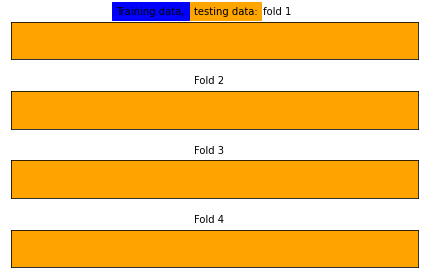

In [153]:
k_fold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
plot_kfolds(k_fold)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [134]:
C_vals_exponents=np.linspace(3,-3,13)
C_vals_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [118]:
C_vals=np.float(10)**C_vals_exponents

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [119]:
from sklearn.model_selection import StratifiedKFold
k_fold=StratifiedKFold(n_splits=4, random_state=1, shuffle=False)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [120]:
def cross_val_C_search_pipe(k_fold,C_vals_exponents,scale_lr_pipeline,X,Y):
    set_params(scale_lr_pipeline,model__C =3.0)
    return X
scale_lr_pipeline.fit(X,Y)
scale_lr_pipeline.predict_proba(x_test)
scale_lr_pipeline.get_params()['model__C']

2.0

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [121]:
from sklearn.linear_model import LogisticRegression
cross_val_C_search_pipe(k_fold,C_vals,scale_lr_pipeline,X,Y)

array([[130000,      2,      1, ...,    390,    390,    390],
       [ 50000,      3,      2, ...,  15788,  13668,   4490],
       [ 40000,      3,      2, ...,      0,   1851,      0],
       ...,
       [ 50000,      2,      1, ...,    855,    726,    687],
       [230000,      2,      1, ...,    476,    476,   1685],
       [ 80000,      2,      1, ...,      0,    194,    756]], dtype=int64)

In [122]:
scale_lr_pipeline.C=10**(-1.5)
scale_lr_pipeline.fit(X,Y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

0

0

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

In [123]:
n_folds = k_fold.n_splits
cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
cv_test_roc_auc = np.empty((n_folds, len(C_vals)))

In [137]:
C_vals_exponents=np.log(C_vals)

In [138]:
 cv_test_roc = [[]]*len(C_vals)

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

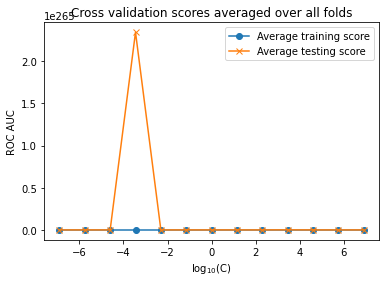

In [139]:
plt.plot(C_vals_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_vals_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [143]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [144]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
from sklearn.model_selection import train_test_split
X,x_test,Y,y_test=train_test_split(data[feature_list].values,data['default payment next month'].values,test_size=0.2,random_state=24)
make_interactions.fit(X,Y)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

In [148]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
cross_val_C_search_pipe(k_fold, C_vals, scale_lr_pipeline, X,Y)

array([[230000,      1,      2, ...,    669,   5000,  19000],
       [ 40000,      3,      1, ...,      0,    349,    872],
       [210000,      2,      2, ...,   1026,      0,      0],
       ...,
       [ 30000,      2,      1, ...,    106,   3000,      0],
       [ 80000,      2,      2, ...,   2300,   2300,   2600],
       [190000,      2,      2, ...,   3000,   3000,   3000]], dtype=int64)

Text(0.5, 1.0, 'Cross validation scores for each fold')

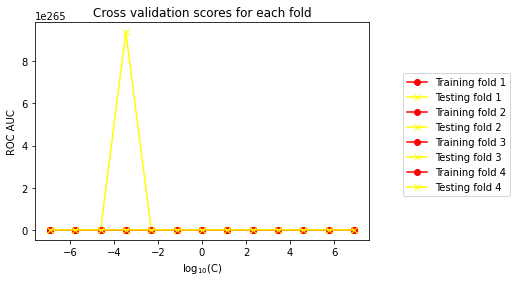

In [150]:
for this_fold in range(n_folds):
    plt.plot(C_vals_exponents, cv_train_roc_auc[this_fold], '-o',
             color='red', label='Training fold {}'.format(this_fold+1))
    plt.plot(C_vals_exponents, cv_test_roc_auc[this_fold], '-x',
             color='yellow', label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

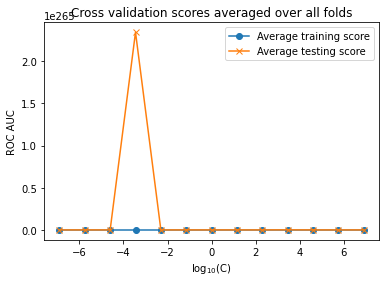

In [152]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.plot(C_vals_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_vals_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**